In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Nadam
from keras.callbacks import EarlyStopping
import numpy as np
from os.path import join
from pickle import load
import shutil
from sklearn.metrics import mean_squared_error
import keras.backend as K
import random
import os
import datetime


Using TensorFlow backend.


In [2]:
# 모델 불러올 때
# 선언이 필요함
def X_Axis_RMSE_pct(y_true, y_pred):
    NumAxis = 0
    y_true = tf.transpose(tf.reshape(tf.squeeze(y_true), [3,-1]))[:,NumAxis]
    y_pred = tf.transpose(tf.reshape(tf.squeeze(y_pred), [3,-1]))[:,NumAxis]
    y_true = (y_true - K.constant(load_scaler4Y_moBHWT.min_[NumAxis])) / K.constant(load_scaler4Y_moBHWT.scale_[NumAxis])
    y_pred = (y_pred - K.constant(load_scaler4Y_moBHWT.min_[NumAxis])) / K.constant(load_scaler4Y_moBHWT.scale_[NumAxis])
    # default is RMSE, squaredbool, default=True If True returns MSE value, if False returns RMSE value.
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
    X_Axis_RMSE_pct = 100 * K.sqrt(K.mean(K.square(y_pred - y_true))) / (K.max(y_true) - K.min(y_true))
    print(f"\nUsing {numFold} fold scaler")
    return X_Axis_RMSE_pct
    
def Y_Axis_RMSE_pct(y_true, y_pred):
    NumAxis = 1
    y_true = tf.transpose(tf.reshape(tf.squeeze(y_true), [3,-1]))[:,NumAxis]
    y_pred = tf.transpose(tf.reshape(tf.squeeze(y_pred), [3,-1]))[:,NumAxis]
    y_true = (y_true - K.constant(load_scaler4Y_moBHWT.min_[NumAxis])) / K.constant(load_scaler4Y_moBHWT.scale_[NumAxis])
    y_pred = (y_pred - K.constant(load_scaler4Y_moBHWT.min_[NumAxis])) / K.constant(load_scaler4Y_moBHWT.scale_[NumAxis])
    # default is RMSE, squaredbool, default=True If True returns MSE value, if False returns RMSE value.
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
    Y_Axis_RMSE_pct = 100 * K.sqrt(K.mean(K.square(y_pred - y_true))) / (K.max(y_true) - K.min(y_true))
    print(f"\nUsing {numFold} fold scaler")
    return Y_Axis_RMSE_pct

def Z_Axis_RMSE_pct(y_true, y_pred):
    NumAxis = 2
    y_true = tf.transpose(tf.reshape(tf.squeeze(y_true), [3,-1]))[:,NumAxis]
    y_pred = tf.transpose(tf.reshape(tf.squeeze(y_pred), [3,-1]))[:,NumAxis]
    y_true = (y_true - K.constant(load_scaler4Y_moBHWT.min_[NumAxis])) / K.constant(load_scaler4Y_moBHWT.scale_[NumAxis])
    y_pred = (y_pred - K.constant(load_scaler4Y_moBHWT.min_[NumAxis])) / K.constant(load_scaler4Y_moBHWT.scale_[NumAxis])
    # default is RMSE, squaredbool, default=True If True returns MSE value, if False returns RMSE value.
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
    Z_Axis_RMSE_pct = 100 * K.sqrt(K.mean(K.square(y_pred - y_true))) / (K.max(y_true) - K.min(y_true))
    print(f"\nUsing {numFold} fold scaler")
    return Z_Axis_RMSE_pct


In [12]:
# Model 생성, compile
def create_model():
    model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(4242,)),
    tf.keras.layers.Dense(6000, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4000, activation='relu'),  
    tf.keras.layers.Dense(303, activation='linear'),  
    ])

    return model
myoptim=Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, decay=0.0)

model = create_model()
model.compile(optimizer=myoptim,
            loss='mean_absolute_error',
            metrics=[X_Axis_RMSE_pct, Y_Axis_RMSE_pct, Z_Axis_RMSE_pct])
SaveDir = '/restricted/projectnb/movelab/bcha/IMUforKnee/trainedModel/Dense_1st/IWALQQ_1st/test'
model.save(SaveDir)

INFO:tensorflow:Assets written to: /restricted/projectnb/movelab/bcha/IMUforKnee/trainedModel/Dense_1st/IWALQQ_1st/test/assets


In [13]:
imported =  keras.models.load_model(SaveDir, custom_objects={"X_Axis_RMSE_pct": X_Axis_RMSE_pct,'Y_Axis_RMSE_pct':Y_Axis_RMSE_pct,'Z_Axis_RMSE_pct':Z_Axis_RMSE_pct})

In [14]:
imported.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 6000)              25458000  
_________________________________________________________________
dropout_3 (Dropout)          (None, 6000)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 4000)              24004000  
_________________________________________________________________
dense_11 (Dense)             (None, 303)               1212303   
Total params: 50,674,303
Trainable params: 50,674,303
Non-trainable params: 0
_________________________________________________________________


# 불러온 모델에 실제 데이터 넣고 결과보기

In [15]:
dataSetDir = '../DATASET/IWALQQ_1st'
numFold = 0

load_train = np.load(join(dataSetDir,f"{numFold}_fold_final_train.npz"))
load_test = np.load(join(dataSetDir,f"{numFold}_fold_final_test.npz"))
load_scaler4Y_moBHWT = load(open(join(dataSetDir,f"{numFold}_fold_scaler4Y_moBHWT.pkl"), 'rb'))

In [16]:
load_train["final_X_train"].shape

(722, 4242, 1)

In [17]:
# 정답데이터
X_test = np.squeeze(load_test["final_X_test"][0], axis=1)
Y_moBHWT_test = load_test["final_Y_moBHWT_test"][0]
Y_moBHWT_test = tf.convert_to_tensor(Y_moBHWT_test,dtype='float32')

In [18]:
X_test_re = np.reshape(X_test,[-1,len(X_test)])

In [19]:
X_test_re.shape

(1, 4242)

In [20]:
result = imported.predict(X_test_re)

2022-04-22 15:42:02.329392: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-04-22 15:42:02.329968: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2394305000 Hz


In [21]:
t_result = np.transpose(result)

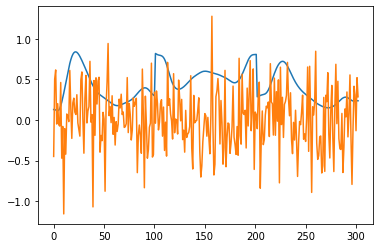

In [22]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = np.array([_ for _ in range(0,303)])
ypoints = np.array(Y_moBHWT_test)
ypoints_2 = np.array(t_result)

plt.plot(xpoints, ypoints, xpoints, ypoints_2)
plt.show()